In [1]:
import h5py
import os
import cPickle as pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import collections

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
(image_metadata, book_metadata, image_to_idx) = pickle.load(open("/data/all_metadata.pkl", 'r'))
image_hdf5 = h5py.File('/data/image_data.hdf5','r')

In [3]:
labels = []
with open("/data/10k_aug_outputs/output_labels9800.txt", 'r') as ifile:
    for line in ifile:
        labels.append(line.rstrip())
print labels

['animals', 'nature', 'text', 'maps', 'people', 'seals', 'miniatures', 'objects', 'architecture', 'decorations', 'landscapes', 'diagrams']


/data/1M_tags/Chunk98.pkl
[  2.94249057e-05   2.47128744e-04   2.27261207e-05   8.68173011e-05
   1.44324731e-04   9.38013764e-05   3.33539174e-05   5.98136056e-03
   7.21738040e-02   8.06584239e-07   9.21015680e-01   1.70685511e-04]
000156506_0_000107_1_ 1883


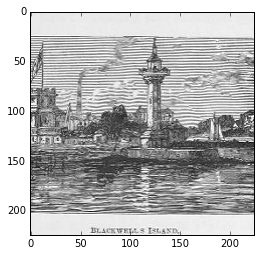

In [8]:
tag_to_count = collections.defaultdict(lambda: 0)
for i in range(98,99):
    chunk_file = "/data/1M_tags/Chunk{}.pkl".format(i)
    print chunk_file
    scores = pickle.load(open(chunk_file, 'r'))

    for idx in range(len(scores.keys())):
        tag = labels[np.argmax(scores[idx])]
        tag_to_count[np.argmax(scores[idx])] += 1
        #continue
        image_metadata[i * 5000 + idx][-1] = tag
        if tag == 'landscapes':
            print scores[idx]

            [img, date] = image_metadata[i * 5000 + idx][:2]
            print img, date
            plt.imshow(image_hdf5["Chunk{}".format(i)][idx][:,:,0], cmap=mpl.cm.gray)

            break
    break

In [26]:
chunk_file = "/data/1M_tags/Chunk20.pkl".format(i)
pickle.load(open(chunk_file, 'r'))[]
#plt.imshow(image_hdf5["Chunk5".format(i)][idx][:,:,0], cmap=mpl.cm.gray)

array([[  6.00119820e-03,   6.09562441e-04,   1.64276846e-02,
          9.65144660e-04,   3.63082741e-03,   8.26477706e-02,
          8.69922698e-01,   5.89029631e-03,   2.82809691e-04,
          1.28218373e-02,   3.45465640e-04,   4.54788213e-04]], dtype=float32)